In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from specialist_data import pipeline
from models.stats.context_stats import ContextStats
# from graph_utils import *
#
import plotly.graph_objects as go
import plotly.express as px

manager = pipeline()

transformed = manager.transformed.get('s10')

Evolution EDA

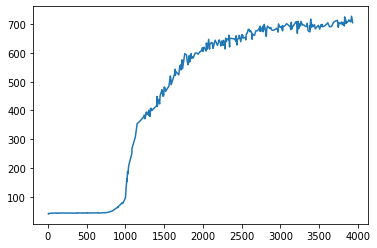

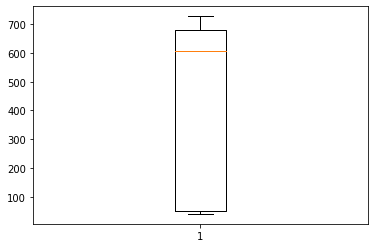

In [17]:
stats = ContextStats('../../data/xdpole', [10])

s = stats.get_seed(10)
stats.fitness_evolution()

plt.boxplot(s.run_data.avgfit)
plt.show()

fig = go.Figure(px.box(s.run_data.avgfit))
fig.show()

Initial Condition EDA

X Boxplots


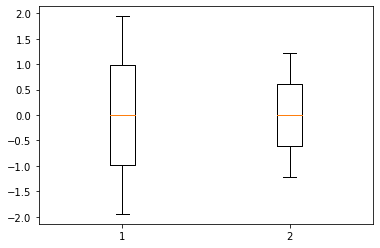

A Boxplots


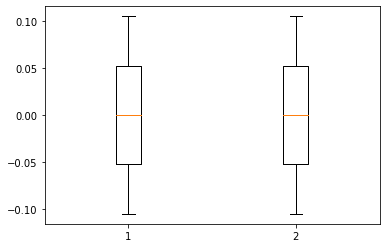

B Boxplots


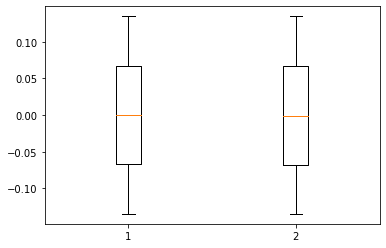

In [3]:
ic_df = transformed.data

print('X Boxplots')
plt.boxplot([ic_df.x1, ic_df.x2], showfliers=False)
plt.show()

print('A Boxplots')
plt.boxplot([ic_df.a1, ic_df.b1], showfliers=False)
plt.show()

print('B Boxplots')
plt.boxplot([ic_df.a2, ic_df.b2], showfliers=False)
plt.show()


Conditions Distribution

Last Generations
x1 Dist


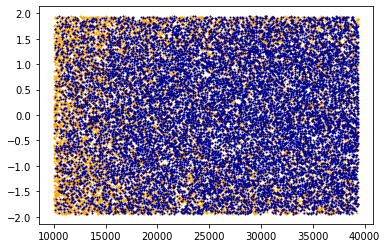

x2 Dist


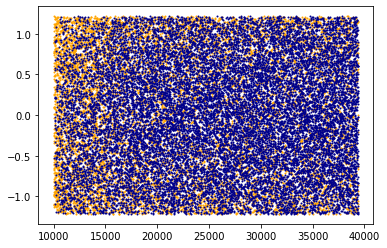

a1 Dist


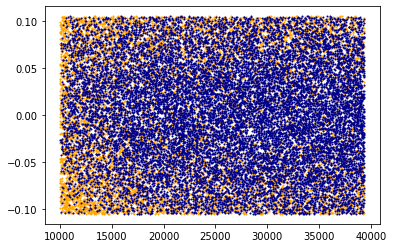

a2 Dist


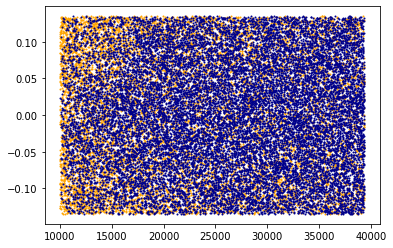

b1 Dist


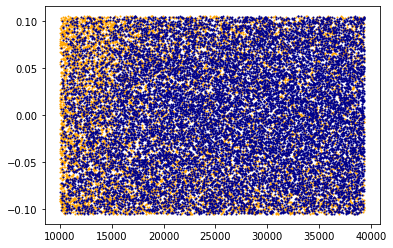

b2 Dist


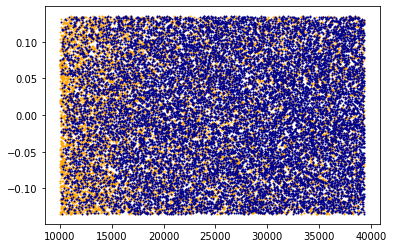

In [4]:
last_gens = ic_df.query('index > 10000')

ic_good = last_gens.query('performance == 1000')
ic_bad = last_gens.query('performance < 100')


def dist(col):
    print(col + ' Dist')
    plt.scatter(ic_bad.index, ic_bad[col], s=1, color='orange')
    plt.scatter(ic_good.index, ic_good[col], s=1, color='darkblue')
    plt.show()


print('Last Generations')

dist('x1')
dist('x2')
dist('a1')
dist('a2')
dist('b1')
dist('b2')


First Generations
x1 Dist


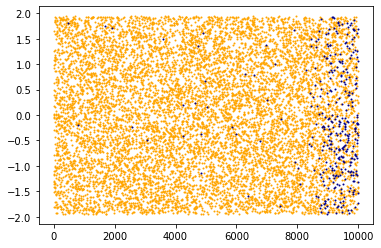

x2 Dist


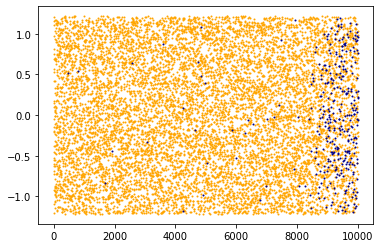

a1 Dist


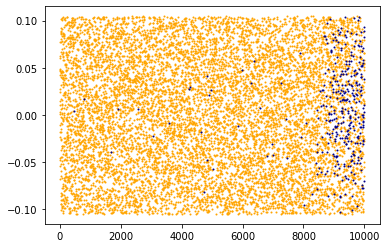

a2 Dist


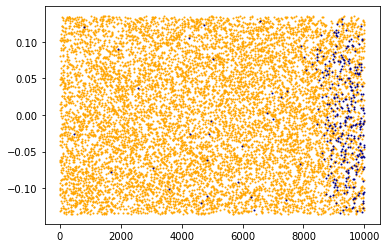

b1 Dist


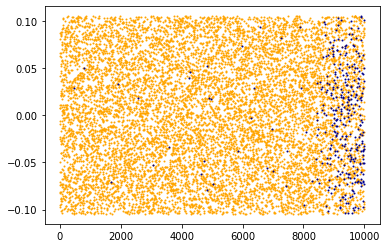

b2 Dist


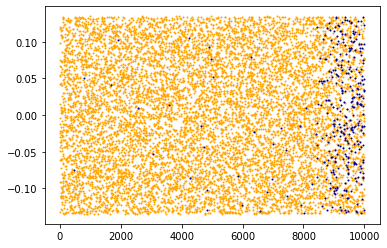

In [5]:
first_gens = ic_df.query('index < 10000')

ic_good = first_gens.query('performance > 100')
ic_bad = first_gens.query('performance < 100')

print('First Generations')

dist('x1')
dist('x2')
dist('a1')
dist('a2')
dist('b1')
dist('b2')


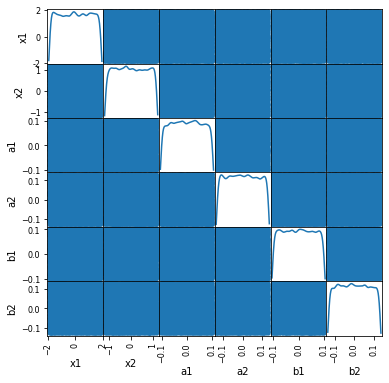

In [6]:
from pandas.plotting import scatter_matrix

matrix_of_scatterplots = scatter_matrix(
    transformed.X, alpha=0.2, figsize=(6, 6), diagonal='kde')



Label & Performance Distribution

In [7]:
generate_hist(ic_df, 'performance')
generate_hist(ic_df, 'level')


NameError: name 'generate_hist' is not defined

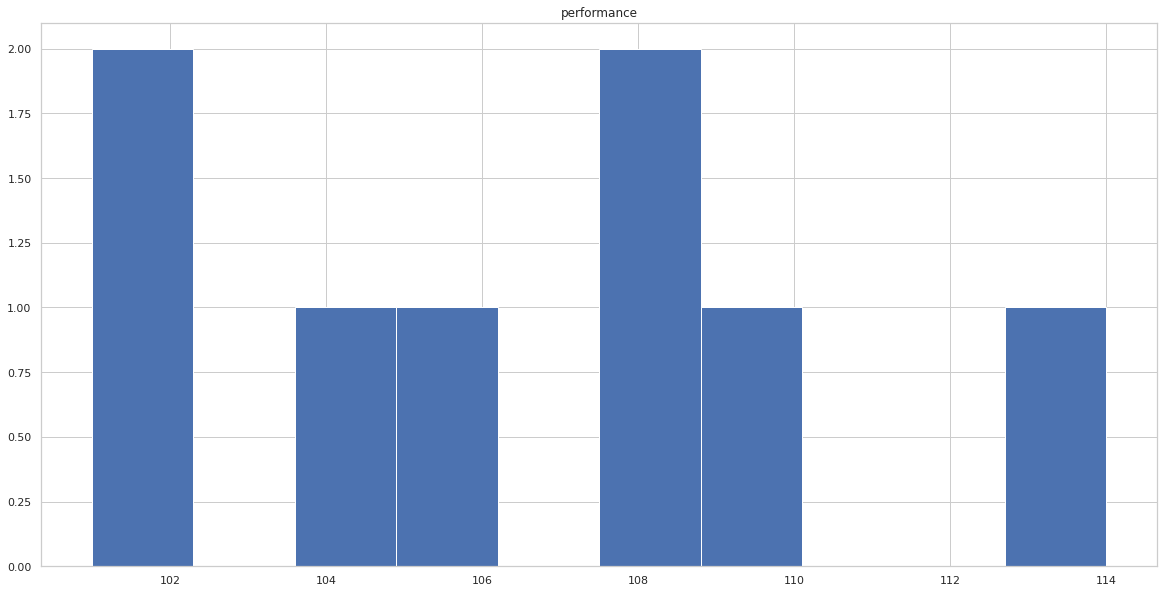

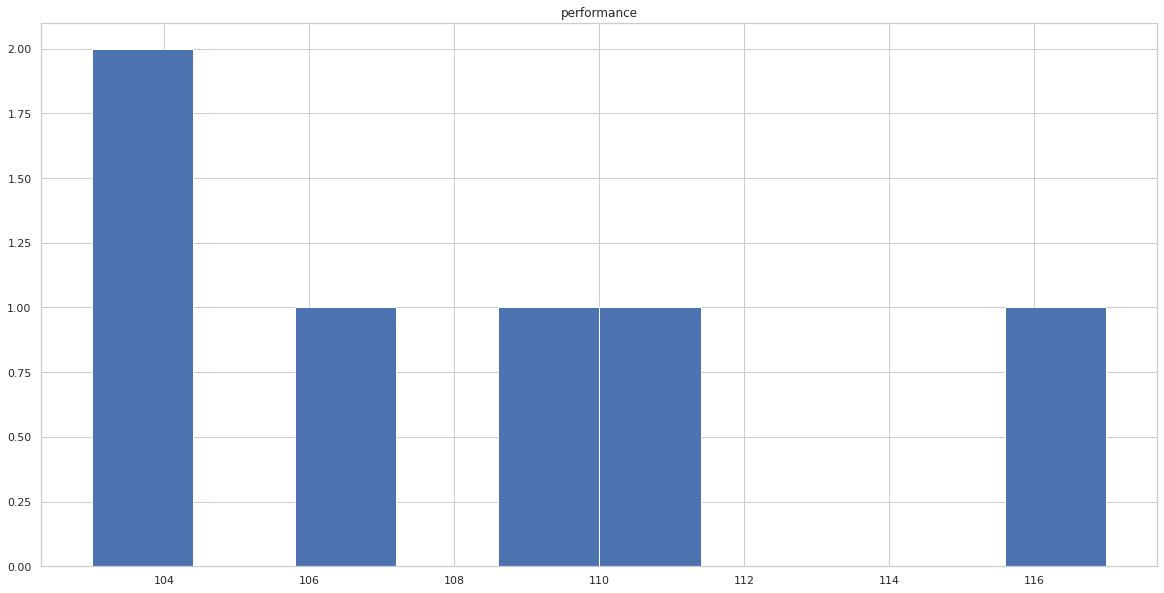

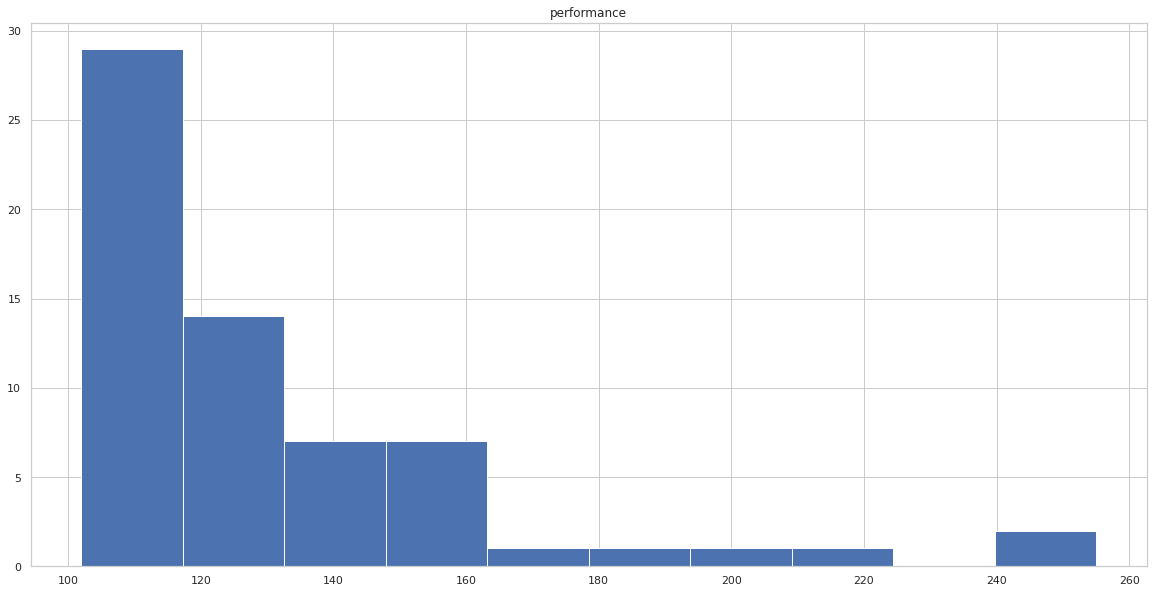

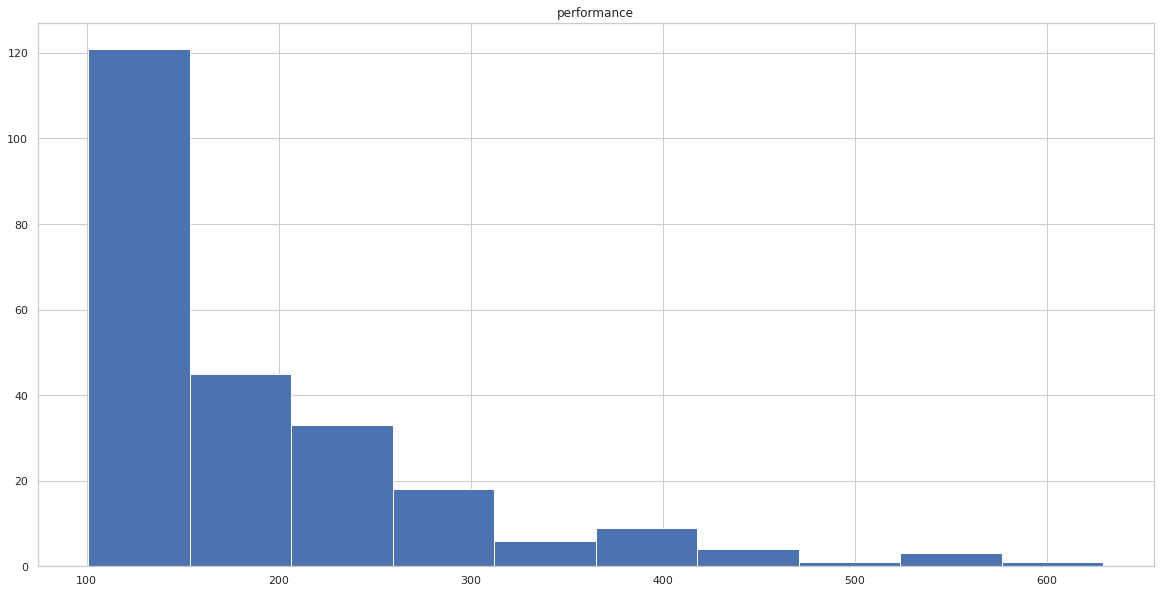

In [ ]:
not_bad = ic_df.query('performance > 100')

d1 = not_bad.query('index > 5000 and index < 7000')
d2 = not_bad.query('index > 7000 and index < 8000')
d3 = not_bad.query('index > 8000 and index < 9000')
d4 = not_bad.query('index > 9000 and index < 10000')

divisions = [d1, d2, d3, d4]

for d in divisions:
    generate_hist(d, 'performance')
